In [533]:
#retirar warnings
import warnings
warnings.filterwarnings('ignore')

In [534]:
import pandas as pd
pd.set_option('display.max_columns', None)
df = pd.read_excel("./Dados/Fonte dos Dados.xlsx")
df.head()

,nomeLocalidade,estado,População residente,Densidade demográfica,Porcentagem de Jovens,Porcentagem de Ativos,Porcentagem de Idosos,Taxa de Urbanização,Taxa de Saneamento Básico,Ativos com Baixo Nível Educacional,Ativos com Médio Nível Educacional,Ativos com Alto Nível Educacional,Percentual de estrangeiros ao total de Trabalhadores,PIB Municipal,Estudantes Ensino primário,Estudantes Ensino secundário,Estudantes Ensino superior,Óbitos até 1 ano de idade por milhares de habitantes,Óbitos por milhares de habitantes,Nascidos por milhares de habitantes,Hospitais por milhares de habitantes,Médicos por milhares de habitantes,% de pobres,IDH,Percentual de trabalhadores especializados,"Valores de Importação por 10,000 habitantes","Valores de Exportação por 10,000 habitantes","Número de hotéis por 10,000 habitantes",Percentual de empresas do setor primário em relação ao total,Percentual de empresas do setor secundário em relação ao total,Percentual de empresas do setor terciário em relação ao total,Percentual de trabalhadores do setor primário em relação ao total,Percentual de trabalhadores do setor secundário em relação ao total,Percentual de trabalhadores do setor terciário em relação ao total,Média Salarial,Produtividade,Taxa de desemprego dos jovens,Taxa de desemprego,"Número de trabalhadores(Comerciais, hotéis e restaurantes) por 1,000 habitantes","Número de ativos culturais e de lazer por 10,000 habitantes"
0,Acrelândia,Acre,12538,6.93,52.92,43.04,4.04,48.34,0.00,75.34,19.52,5.14,0.08,1.221749e+08,3382,643,27,0.3,2.8,18.1,0.0,0.00,36.56,0.81,4.06,0.00,0.00,0.00,6.56,18.03,75.41,8.86,21.53,34.07,994.67,2654247.23,19.17,9.62,12.12,0.0
1,Assis Brasil,Acre,6072,1.22,55.58,40.07,4.35,65.30,2.39,66.83,26.93,6.23,14.19,4.205170e+07,2210,473,102,0.3,2.5,63.2,0.0,0.17,44.09,0.77,5.44,0.00,0.00,3.29,0.00,0.00,100.00,0.60,0.00,36.25,1163.49,2113108.99,10.57,7.44,17.79,0.0
2,Brasiléia,Acre,21398,5.46,51.88,42.76,5.37,70.02,21.27,70.67,21.29,8.04,2.00,1.906333e+08,4839,1297,309,0.1,4.2,25.0,0.0,0.14,35.22,0.77,8.55,14731.75,2119542.01,0.93,9.23,6.92,83.85,2.53,17.70,33.83,818.65,2376384.22,11.13,5.96,14.58,0.0
3,Bujari,Acre,8471,2.79,52.71,42.60,4.69,44.07,0.16,71.05,22.05,6.90,1.07,8.616439e+07,2348,487,53,0.4,0.5,21.0,0.0,0.00,37.61,0.77,5.52,0.00,0.00,0.00,40.00,6.67,53.33,31.34,1.04,29.40,897.30,2668575.85,9.76,3.41,5.78,0.0
4,Capixaba,Acre,8798,5.17,53.92,41.92,4.16,44.60,0.82,77.90,16.60,5.49,0.00,1.083468e+08,2539,327,37,0.1,0.8,16.8,0.0,0.00,35.00,0.79,5.30,0.00,93536.03,0.00,12.50,25.00,62.50,4.30,30.37,10.32,843.49,2803488.37,6.35,4.14,7.73,0.0


In [535]:
df_alunos = pd.read_excel("./Dados/Dados_Projeto_-_Alunos_Sirius.xlsx")
df_alunos.head()

,Naturalidade,Cidade,Últimos estudos - Dados gerais,Escolaridade,Situação do aluno,FormaIngresso
0,São Paulo/SP,SÃO PAULO,Centro Universitário IESB -\nBrasília\nDF\nAno...,Superior - Completo,MATRICULADO,Entrevista
1,Belo Horizonte/MG,BELO HORIZONTE,Centro Uniaversitário una -\nBelo Horizonte\nM...,Superior - Completo,MATRICULADO,Entrevista
2,Ponta Grossa/PR,SÃO CARLOS,UNIVERSIDADE FEDERAL DE ITAJUBÁ - Pública\n\n\...,Superior - Completo,MATRICULADO,Entrevista
3,Goiânia/GO,GOIÂNIA,PONTIFÍCIA UNIVERSIDADE CATÓLICA DE Goiás -\nG...,Superior - Completo,MATRICULADO,Entrevista
4,São Paulo/SP,SÃO PAULO,Centro Universitário FMU - FIAM FAAM -\n\n\nAn...,Superior - Completo,MATRICULADO,Entrevista


In [536]:
df_alunos['Cidade'] = df_alunos['Cidade'].str.lower()

In [537]:
df['nomeLocalidade'] = df['nomeLocalidade'].str.lower()

In [538]:
# check the values of each row for each column
n = df_alunos.nunique(axis=0)
print("Nº de valores unicos em cada coluna :\n",
      n)

Nº de valores unicos em cada coluna :
 Naturalidade                      46
Cidade                            37
Últimos estudos - Dados gerais    65
Escolaridade                       2
Situação do aluno                  3
FormaIngresso                      1
dtype: int64


In [539]:
#contar valores de uma coluna Cidade
df_alunos['Cidade'].value_counts()

são paulo                17
belo horizonte           12
campinas                  5
rio de janeiro            5
osasco                    3
santos                    2
brasília                  2
porto alegre              2
são josé dos campos       2
campo grande              2
recife                    2
florianópolis             2
goiânia                   2
uberlândia                1
nilópolis                 1
londrina                  1
monte mor                 1
itabira                   1
carlos barbosa            1
petrolina                 1
barretos                  1
pinheiral                 1
toledo                    1
bragança paulista         1
igarassu                  1
assis                     1
joinville                 1
são bernardo do campo     1
santo andré               1
capinzal                  1
itajaí                    1
campo limpo paulista      1
americana                 1
joão pessoa               1
balneário camboriú        1
são carlos          

In [540]:
# Filtrar df com base em df_alunos
df_filtrado = df[df['nomeLocalidade'].isin(df_alunos['Cidade'])]

df_filtrado.head()

,nomeLocalidade,estado,População residente,Densidade demográfica,Porcentagem de Jovens,Porcentagem de Ativos,Porcentagem de Idosos,Taxa de Urbanização,Taxa de Saneamento Básico,Ativos com Baixo Nível Educacional,Ativos com Médio Nível Educacional,Ativos com Alto Nível Educacional,Percentual de estrangeiros ao total de Trabalhadores,PIB Municipal,Estudantes Ensino primário,Estudantes Ensino secundário,Estudantes Ensino superior,Óbitos até 1 ano de idade por milhares de habitantes,Óbitos por milhares de habitantes,Nascidos por milhares de habitantes,Hospitais por milhares de habitantes,Médicos por milhares de habitantes,% de pobres,IDH,Percentual de trabalhadores especializados,"Valores de Importação por 10,000 habitantes","Valores de Exportação por 10,000 habitantes","Número de hotéis por 10,000 habitantes",Percentual de empresas do setor primário em relação ao total,Percentual de empresas do setor secundário em relação ao total,Percentual de empresas do setor terciário em relação ao total,Percentual de trabalhadores do setor primário em relação ao total,Percentual de trabalhadores do setor secundário em relação ao total,Percentual de trabalhadores do setor terciário em relação ao total,Média Salarial,Produtividade,Taxa de desemprego dos jovens,Taxa de desemprego,"Número de trabalhadores(Comerciais, hotéis e restaurantes) por 1,000 habitantes","Número de ativos culturais e de lazer por 10,000 habitantes"
37,campo grande,Alagoas,9032,53.13,51.47,41.64,6.90,49.07,7.88,83.96,14.17,1.88,0.00,3.602124e+07,3566,0,0,0.1,1.7,18.6,0.00,0.00,57.50,0.74,7.35,0.00,0.00,1.11,6.90,0.00,93.10,10.29,0.00,89.71,737.24,1108338.46,9.79,5.66,5.43,0.00
803,brasília,Distrito Federal,2570160,444.66,41.79,53.23,4.99,96.35,80.61,36.39,34.25,29.36,0.49,1.445732e+11,314878,147170,157611,0.2,5.2,21.1,0.11,2.57,4.93,0.87,25.96,0.00,0.00,1.02,0.72,12.00,87.26,0.58,9.74,51.76,1814.71,11197161.88,19.41,8.19,61.68,2.37
976,goiânia,Goiás,1302001,1775.98,39.50,54.24,6.26,99.62,69.83,38.37,35.04,26.59,0.69,2.929786e+10,177461,78471,88212,0.2,8.8,17.1,0.14,1.38,3.09,0.84,20.14,0.00,0.00,1.46,0.83,19.73,79.42,0.49,17.64,49.92,1256.88,4134558.32,12.02,5.35,63.38,2.33
1505,campo grande,Mato Grosso do Sul,786797,97.22,40.95,52.37,6.68,98.40,44.57,41.56,34.74,23.71,0.92,1.512882e+10,130985,44327,38019,0.2,7.2,17.5,0.08,1.95,4.59,0.84,24.56,0.00,0.00,1.59,2.48,14.13,83.35,1.88,14.95,53.57,1192.88,3717763.99,15.53,6.56,50.74,1.82
1629,belo horizonte,Minas Gerais,2375151,7167.00,35.85,55.46,8.70,100.00,96.13,39.40,32.46,28.14,4.10,5.922232e+10,358105,149226,175438,0.1,8.3,14.9,0.06,4.48,3.80,0.86,23.19,3361844.65,2019442.98,1.35,0.99,16.12,82.86,0.28,16.68,56.28,1463.63,4787753.52,15.45,6.51,72.56,2.97


In [541]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 37 to 5270
Data columns (total 40 columns):
 #   Column                                                                           Non-Null Count  Dtype  
---  ------                                                                           --------------  -----  
 0   nomeLocalidade                                                                   40 non-null     object 
 1   estado                                                                           40 non-null     object 
 2   População residente                                                              40 non-null     int64  
 3   Densidade demográfica                                                            40 non-null     float64
 4   Porcentagem de Jovens                                                            40 non-null     float64
 5   Porcentagem de Ativos                                                            40 non-null     float64
 6   Porcentag

In [542]:
df_filtrado.corr()["Produtividade"].sort_values()

% de pobres                                                                       -0.412336
Ativos com Baixo Nível Educacional                                                -0.393818
Percentual de trabalhadores do setor primário em relação ao total                 -0.292549
Porcentagem de Idosos                                                             -0.239760
Percentual de empresas do setor primário em relação ao total                      -0.200727
Porcentagem de Jovens                                                             -0.179605
Número de hotéis por 10,000 habitantes                                            -0.044539
Percentual de empresas do setor secundário em relação ao total                     0.005633
Óbitos por milhares de habitantes                                                  0.010165
Hospitais por milhares de habitantes                                               0.018896
Percentual de empresas do setor terciário em relação ao total                   

<Axes: xlabel='Produtividade', ylabel='Density'>

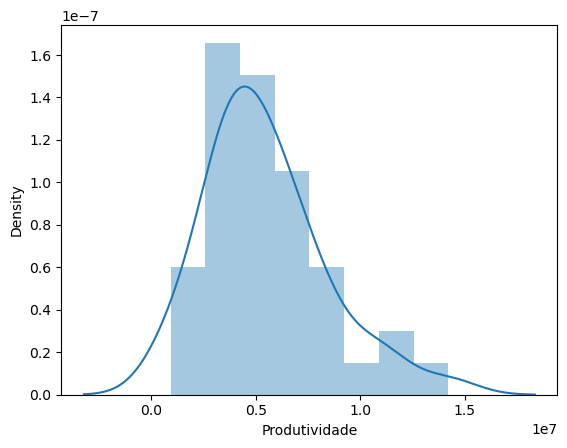

In [561]:
#plotar a distribuição de Produtividade
import seaborn as sns
sns.distplot(df_filtrado['Produtividade'])


In [543]:
# transformar a coluna Produtividade em log
import numpy as np
df_filtrado['Produtividade_log'] = np.log(df_filtrado['Produtividade'])

<Axes: xlabel='Produtividade_log', ylabel='Density'>

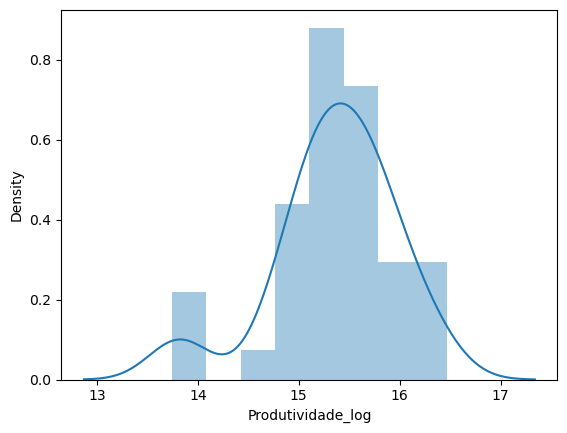

In [562]:
#plotar a distribuição de Produtividade_log

sns.distplot(df_filtrado['Produtividade_log'])

In [544]:
df_filtrado.corr()["Produtividade_log"].sort_values()

Ativos com Baixo Nível Educacional                                                -0.619499
% de pobres                                                                       -0.611955
Porcentagem de Jovens                                                             -0.320887
Percentual de trabalhadores do setor primário em relação ao total                 -0.307271
Percentual de empresas do setor primário em relação ao total                      -0.242091
Porcentagem de Idosos                                                             -0.230009
Percentual de empresas do setor terciário em relação ao total                     -0.043745
Número de hotéis por 10,000 habitantes                                             0.078499
Óbitos até 1 ano de idade por milhares de habitantes                               0.089630
Percentual de empresas do setor secundário em relação ao total                     0.126884
Taxa de desemprego                                                              

In [545]:
correlacao = df_filtrado.corr() #criando uma matriz de correlação
correlacao_filtrada = correlacao[correlacao["Produtividade_log"].abs()>0.1]["Produtividade_log"]
correlacao_filtrada

População residente                                                                0.285692
Densidade demográfica                                                              0.272277
Porcentagem de Jovens                                                             -0.320887
Porcentagem de Ativos                                                              0.580426
Porcentagem de Idosos                                                             -0.230009
Taxa de Urbanização                                                                0.756121
Taxa de Saneamento Básico                                                          0.503438
Ativos com Baixo Nível Educacional                                                -0.619499
Ativos com Médio Nível Educacional                                                 0.454960
Ativos com Alto Nível Educacional                                                  0.558202
Percentual de estrangeiros ao total de Trabalhadores                            

In [546]:
correlacao_filtrada.index

Index(['População residente', 'Densidade demográfica', 'Porcentagem de Jovens',
       'Porcentagem de Ativos', 'Porcentagem de Idosos', 'Taxa de Urbanização',
       'Taxa de Saneamento Básico', 'Ativos com Baixo Nível Educacional',
       'Ativos com Médio Nível Educacional',
       'Ativos com Alto Nível Educacional',
       'Percentual de estrangeiros ao total de Trabalhadores', 'PIB Municipal',
       'Estudantes Ensino primário', 'Estudantes Ensino secundário',
       'Estudantes Ensino superior', 'Óbitos por milhares de habitantes',
       'Nascidos por milhares de habitantes',
       'Hospitais por milhares de habitantes',
       'Médicos por milhares de habitantes', '% de pobres', 'IDH',
       'Percentual de trabalhadores especializados',
       'Valores de Importação por 10,000 habitantes',
       'Valores de Exportação por 10,000 habitantes',
       'Percentual de empresas do setor primário em relação ao total',
       'Percentual de empresas do setor secundário em relação 

In [547]:
df1 = df_filtrado[correlacao_filtrada.index].copy() #seleção das variáveis de interesse.

In [548]:
df1.head()

,População residente,Densidade demográfica,Porcentagem de Jovens,Porcentagem de Ativos,Porcentagem de Idosos,Taxa de Urbanização,Taxa de Saneamento Básico,Ativos com Baixo Nível Educacional,Ativos com Médio Nível Educacional,Ativos com Alto Nível Educacional,Percentual de estrangeiros ao total de Trabalhadores,PIB Municipal,Estudantes Ensino primário,Estudantes Ensino secundário,Estudantes Ensino superior,Óbitos por milhares de habitantes,Nascidos por milhares de habitantes,Hospitais por milhares de habitantes,Médicos por milhares de habitantes,% de pobres,IDH,Percentual de trabalhadores especializados,"Valores de Importação por 10,000 habitantes","Valores de Exportação por 10,000 habitantes",Percentual de empresas do setor primário em relação ao total,Percentual de empresas do setor secundário em relação ao total,Percentual de trabalhadores do setor primário em relação ao total,Percentual de trabalhadores do setor secundário em relação ao total,Percentual de trabalhadores do setor terciário em relação ao total,Média Salarial,Produtividade,Taxa de desemprego dos jovens,Taxa de desemprego,"Número de trabalhadores(Comerciais, hotéis e restaurantes) por 1,000 habitantes","Número de ativos culturais e de lazer por 10,000 habitantes",Produtividade_log
37,9032,53.13,51.47,41.64,6.90,49.07,7.88,83.96,14.17,1.88,0.00,3.602124e+07,3566,0,0,1.7,18.6,0.00,0.00,57.50,0.74,7.35,0.00,0.00,6.90,0.00,10.29,0.00,89.71,737.24,1108338.46,9.79,5.66,5.43,0.00,13.918373
803,2570160,444.66,41.79,53.23,4.99,96.35,80.61,36.39,34.25,29.36,0.49,1.445732e+11,314878,147170,157611,5.2,21.1,0.11,2.57,4.93,0.87,25.96,0.00,0.00,0.72,12.00,0.58,9.74,51.76,1814.71,11197161.88,19.41,8.19,61.68,2.37,16.231171
976,1302001,1775.98,39.50,54.24,6.26,99.62,69.83,38.37,35.04,26.59,0.69,2.929786e+10,177461,78471,88212,8.8,17.1,0.14,1.38,3.09,0.84,20.14,0.00,0.00,0.83,19.73,0.49,17.64,49.92,1256.88,4134558.32,12.02,5.35,63.38,2.33,15.234891
1505,786797,97.22,40.95,52.37,6.68,98.40,44.57,41.56,34.74,23.71,0.92,1.512882e+10,130985,44327,38019,7.2,17.5,0.08,1.95,4.59,0.84,24.56,0.00,0.00,2.48,14.13,1.88,14.95,53.57,1192.88,3717763.99,15.53,6.56,50.74,1.82,15.128633
1629,2375151,7167.00,35.85,55.46,8.70,100.00,96.13,39.40,32.46,28.14,4.10,5.922232e+10,358105,149226,175438,8.3,14.9,0.06,4.48,3.80,0.86,23.19,3361844.65,2019442.98,0.99,16.12,0.28,16.68,56.28,1463.63,4787753.52,15.45,6.51,72.56,2.97,15.381572


In [549]:
X = df1.drop(["Produtividade",'Produtividade_log','Porcentagem de Ativos','PIB Municipal'
              #,'nomeLocalidade', 'estado'
              ],axis=1)
y = df1["Produtividade_log"]

In [550]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [551]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()

In [552]:
modelo.fit(X_train, y_train)

LinearRegression()

In [553]:
predicao_modelo = modelo.predict(X_test)

In [554]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(np.exp(predicao_modelo), np.exp(y_test))

4901171.508692454

In [555]:
#fazer R2 do modelo
from sklearn.metrics import r2_score
r2_score(y_test, predicao_modelo)

-3.4318447098969695

In [556]:
from sklearn.feature_selection import RFE
#importar decision tree
from sklearn.tree import DecisionTreeRegressor
#importar knn
from sklearn.neighbors import KNeighborsRegressor

# Create the RFE object and rank each pixel
SVR = DecisionTreeRegressor(random_state=42)
rfe = RFE(estimator=SVR, 
          n_features_to_select=5, 
          step=1)
fit = rfe.fit(X_train, y_train)

In [557]:
predicao_rfe = rfe.predict(X_test)

In [558]:
mean_absolute_error(np.exp(predicao_rfe), np.exp(y_test))

903471.3150000009

In [559]:
r2_score(y_test, predicao_rfe)

0.6243965861334184

In [560]:
selected_features = pd.Series(fit.support_, index=X.columns)
print(selected_features[selected_features == True].index)

Index(['Porcentagem de Idosos', 'Taxa de Saneamento Básico',
       'Estudantes Ensino superior', 'Nascidos por milhares de habitantes',
       'Média Salarial'],
      dtype='object')
